## Top 1000 Song Case Study( Data Analysis)
### What Does it take to Hit the charts
#### Objective & Scope
* Collect, clean & analyze Spotify
* Identify variable of interest
* Allow businesses to make data-driven decisions on the given dataset
* Share findings and insights

#### Methodology
* Collect data using "top-spotify-songs-2023"
* Wrangle data using preprocessing, cleaning, transforming and organizing data for further analysis including predictive
* Explore data using available techniques
* Visualize data to uncover insightful discoveries

#### Introduction
##### Leading questions
* What makes a song, a good song according to the dataset?
* Can we identify variables of interest that can be used to predict whether or not(True or False) a song will make it the top 50, top 100, top 500?
* Can the data be transformed for Binary Classification algorithms?

### Collect, Wrangle & Explore

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import PearsonRConstantInputWarning
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('C:/Users/PYTHON/Data Science Projects/Spotify/input/spotify-2023.csv', encoding='latin-1')

In [3]:
df.head(7)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [6]:
df.shape

(953, 24)

In [7]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [8]:
nan_values = df.isna()
print(nan_values)

     track_name  artist(s)_name  artist_count  released_year  released_month  \
0         False           False         False          False           False   
1         False           False         False          False           False   
2         False           False         False          False           False   
3         False           False         False          False           False   
4         False           False         False          False           False   
..          ...             ...           ...            ...             ...   
948       False           False         False          False           False   
949       False           False         False          False           False   
950       False           False         False          False           False   
951       False           False         False          False           False   
952       False           False         False          False           False   

     released_day  in_spotify_playlists

In [9]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [10]:
# To decide which method to use to fill missing value, we check the percent of the data tha is missing
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

#let's check the percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.6339629240993354


In [11]:
df.dropna(subset=['key'])

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [12]:
df.dropna(inplace=True)
missing_values_count2 = df.isnull().sum()
print(missing_values_count2)

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            817 non-null    object
 1   artist(s)_name        817 non-null    object
 2   artist_count          817 non-null    int64 
 3   released_year         817 non-null    int64 
 4   released_month        817 non-null    int64 
 5   released_day          817 non-null    int64 
 6   in_spotify_playlists  817 non-null    int64 
 7   in_spotify_charts     817 non-null    int64 
 8   streams               817 non-null    object
 9   in_apple_playlists    817 non-null    int64 
 10  in_apple_charts       817 non-null    int64 
 11  in_deezer_playlists   817 non-null    object
 12  in_deezer_charts      817 non-null    int64 
 13  in_shazam_charts      817 non-null    object
 14  bpm                   817 non-null    int64 
 15  key                   817 non-null    ob

In [14]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            817 non-null    object 
 1   artist(s)_name        817 non-null    object 
 2   artist_count          817 non-null    int64  
 3   released_year         817 non-null    int64  
 4   released_month        817 non-null    int64  
 5   released_day          817 non-null    int64  
 6   in_spotify_playlists  817 non-null    int64  
 7   in_spotify_charts     817 non-null    int64  
 8   streams               816 non-null    float64
 9   in_apple_playlists    817 non-null    int64  
 10  in_apple_charts       817 non-null    int64  
 11  in_deezer_playlists   817 non-null    object 
 12  in_deezer_charts      817 non-null    int64  
 13  in_shazam_charts      817 non-null    object 
 14  bpm                   817 non-null    int64  
 15  key                   8

In [16]:
track_name_to_id = {name: idx for idx, name in enumerate(df['track_name'].unique())}

df.loc[:, 'track_id'] = df['track_name'].map(track_name_to_id)
df.drop(columns=['track_name'], inplace=True)

In [17]:
df.head()

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_id
0,"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,263,...,B,Major,80,89,83,31,0,8,4,0
1,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,126,...,C#,Major,71,61,74,7,0,10,4,1
2,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,207,...,F,Major,51,32,53,17,0,31,6,2
3,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,207,...,A,Major,55,58,72,11,0,11,15,3
4,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,133,...,A,Minor,65,23,80,14,63,11,6,4


In [18]:
voice_col = ['track_id', 'streams', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
df_voice = df[voice_col]
df_voice.head()

,track_id,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0,141381703.0,125,B,Major,80,89,83,31,0,8,4
1,1,133716286.0,92,C#,Major,71,61,74,7,0,10,4
2,2,140003974.0,138,F,Major,51,32,53,17,0,31,6
3,3,800840817.0,170,A,Major,55,58,72,11,0,11,15
4,4,303236322.0,144,A,Minor,65,23,80,14,63,11,6


In [19]:
#label encoding or one hot encoding?
df_features = df_voice
df_features = pd.get_dummies(df_voice, columns=['key', 'mode'], prefix=['key', 'mode'])

In [20]:
df_features.head()

,track_id,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0,141381703.0,125,80,89,83,31,0,8,4,...,0,0,0,0,0,0,0,0,1,0
1,1,133716286.0,92,71,61,74,7,0,10,4,...,1,0,0,0,0,0,0,0,1,0
2,2,140003974.0,138,51,32,53,17,0,31,6,...,0,0,0,0,1,0,0,0,1,0
3,3,800840817.0,170,55,58,72,11,0,11,15,...,0,0,0,0,0,0,0,0,1,0
4,4,303236322.0,144,65,23,80,14,63,11,6,...,0,0,0,0,0,0,0,0,0,1


In [21]:
#rename columns of interests
re_COL = {
    'danceability_%': 'danceability',
    'valence_%' : 'valence',
    'energy_%' : 'energy',
    'acousticness_%' : 'acousticness',
    'instrumentalness_%' : 'instrumentalness',
    'liveness_%' : 'liveness',
    'speechiness_%' : 'speechiness'
}

In [22]:
df_features.rename(columns=re_COL, inplace=True)
df_features.head()

,track_id,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0,141381703.0,125,80,89,83,31,0,8,4,...,0,0,0,0,0,0,0,0,1,0
1,1,133716286.0,92,71,61,74,7,0,10,4,...,1,0,0,0,0,0,0,0,1,0
2,2,140003974.0,138,51,32,53,17,0,31,6,...,0,0,0,0,1,0,0,0,1,0
3,3,800840817.0,170,55,58,72,11,0,11,15,...,0,0,0,0,0,0,0,0,1,0
4,4,303236322.0,144,65,23,80,14,63,11,6,...,0,0,0,0,0,0,0,0,0,1


### Analyze & Visualization: Data Analysis

In [23]:
df_da = df_features.drop(columns=['track_id'])
df_da.head()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key_A,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,141381703.0,125,80,89,83,31,0,8,4,0,...,0,0,0,0,0,0,0,0,1,0
1,133716286.0,92,71,61,74,7,0,10,4,0,...,1,0,0,0,0,0,0,0,1,0
2,140003974.0,138,51,32,53,17,0,31,6,0,...,0,0,0,0,1,0,0,0,1,0
3,800840817.0,170,55,58,72,11,0,11,15,1,...,0,0,0,0,0,0,0,0,1,0
4,303236322.0,144,65,23,80,14,63,11,6,1,...,0,0,0,0,0,0,0,0,0,1


In [24]:
#df_da = df_features.astype(int)

In [25]:
df_da.describe()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key_A,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
count,8.160000e+02,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,...,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,4.689858e+08,122.565483,67.391677,51.201958,64.362301,26.309670,1.676867,18.168911,10.526316,0.086903,...,0.140759,0.095471,0.036720,0.072215,0.106487,0.084455,0.111383,0.104039,0.553244,0.446756
std,5.231267e+08,28.174803,14.688458,23.620978,16.107587,25.470972,8.767328,13.541996,10.219987,0.281866,...,0.347986,0.294045,0.188188,0.259003,0.308649,0.278240,0.314799,0.305498,0.497462,0.497462
min,2.762000e+03,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.342848e+08,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.638368e+08,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.011986e+08,141.000000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,3.562544e+09,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
binary_columns = ['key_A', 'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor']

for column in binary_columns:
    df_da[column] = df_da[column].astype(int)
print(df_da.head())

       streams  bpm  danceability  valence  energy  acousticness  \
0  141381703.0  125            80       89      83            31   
1  133716286.0   92            71       61      74             7   
2  140003974.0  138            51       32      53            17   
3  800840817.0  170            55       58      72            11   
4  303236322.0  144            65       23      80            14   

   instrumentalness  liveness  speechiness  key_A  ...  key_C#  key_D  key_D#  \
0                 0         8            4      0  ...       0      0       0   
1                 0        10            4      0  ...       1      0       0   
2                 0        31            6      0  ...       0      0       0   
3                 0        11           15      1  ...       0      0       0   
4                63        11            6      1  ...       0      0       0   

   key_E  key_F  key_F#  key_G  key_G#  mode_Major  mode_Minor  
0      0      0       0      0       0 

In [27]:
df_da = df_da.astype(float)
df_da.head()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key_A,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,141381703.0,125.0,80.0,89.0,83.0,31.0,0.0,8.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,133716286.0,92.0,71.0,61.0,74.0,7.0,0.0,10.0,4.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,140003974.0,138.0,51.0,32.0,53.0,17.0,0.0,31.0,6.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,800840817.0,170.0,55.0,58.0,72.0,11.0,0.0,11.0,15.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,303236322.0,144.0,65.0,23.0,80.0,14.0,63.0,11.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
df_da.shape

(817, 22)

In [29]:
scaler = MinMaxScaler()

df_da['streams'] = scaler.fit_transform(df_da[['streams']])
print(df_da.head())

    streams    bpm  danceability  valence  energy  acousticness  \
0  0.039685  125.0          80.0     89.0    83.0          31.0   
1  0.037533   92.0          71.0     61.0    74.0           7.0   
2  0.039298  138.0          51.0     32.0    53.0          17.0   
3  0.224794  170.0          55.0     58.0    72.0          11.0   
4  0.085117  144.0          65.0     23.0    80.0          14.0   

   instrumentalness  liveness  speechiness  key_A  ...  key_C#  key_D  key_D#  \
0               0.0       8.0          4.0    0.0  ...     0.0    0.0     0.0   
1               0.0      10.0          4.0    0.0  ...     1.0    0.0     0.0   
2               0.0      31.0          6.0    0.0  ...     0.0    0.0     0.0   
3               0.0      11.0         15.0    1.0  ...     0.0    0.0     0.0   
4              63.0      11.0          6.0    1.0  ...     0.0    0.0     0.0   

   key_E  key_F  key_F#  key_G  key_G#  mode_Major  mode_Minor  
0    0.0    0.0     0.0    0.0     0.0       

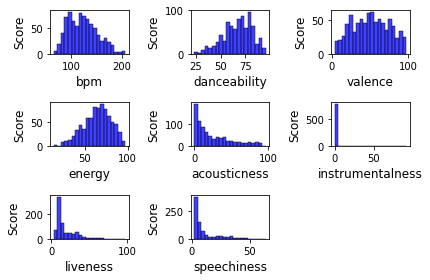

In [30]:
columns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_da, x=column, bins=20, color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Score", fontsize=12)
plt.tight_layout()
plt.show()

In [31]:
columns_to_correlate = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'streams']

correlation_matrix = df_da[columns_to_correlate].corr()
print(correlation_matrix)

                       bpm  danceability   valence    energy  acousticness  \
bpm               1.000000     -0.148174  0.029169  0.013363     -0.010767   
danceability     -0.148174      1.000000  0.389729  0.157970     -0.240454   
valence           0.029169      0.389729  1.000000  0.349736     -0.064072   
energy            0.013363      0.157970  0.349736  1.000000     -0.552637   
acousticness     -0.010767     -0.240454 -0.064072 -0.552637      1.000000   
instrumentalness -0.003407     -0.102144 -0.147032 -0.051662      0.046700   
liveness         -0.005817     -0.100579  0.000142  0.111240     -0.046112   
speechiness       0.038248      0.201189  0.035704 -0.026880     -0.017820   
streams          -0.025694     -0.093268 -0.051014 -0.036499     -0.005751   

                  instrumentalness  liveness  speechiness   streams  
bpm                      -0.003407 -0.005817     0.038248 -0.025694  
danceability             -0.102144 -0.100579     0.201189 -0.093268  
valence  

                       bpm  danceability   valence    energy  acousticness  \
bpm               1.000000     -0.148174  0.029169  0.013363     -0.010767   
danceability     -0.148174      1.000000  0.389729  0.157970     -0.240454   
valence           0.029169      0.389729  1.000000  0.349736     -0.064072   
energy            0.013363      0.157970  0.349736  1.000000     -0.552637   
acousticness     -0.010767     -0.240454 -0.064072 -0.552637      1.000000   
instrumentalness -0.003407     -0.102144 -0.147032 -0.051662      0.046700   
liveness         -0.005817     -0.100579  0.000142  0.111240     -0.046112   
speechiness       0.038248      0.201189  0.035704 -0.026880     -0.017820   
streams          -0.025694     -0.093268 -0.051014 -0.036499     -0.005751   

                  instrumentalness  liveness  speechiness   streams  
bpm                      -0.003407 -0.005817     0.038248 -0.025694  
danceability             -0.102144 -0.100579     0.201189 -0.093268  
valence  

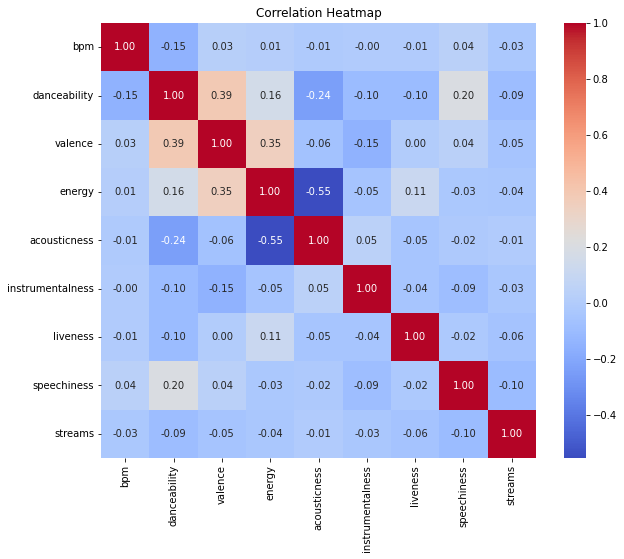

In [32]:
columns_to_correlate = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'streams']

correlation_matrix = df_da[columns_to_correlate].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Correlation Heatmap")
plt.show()

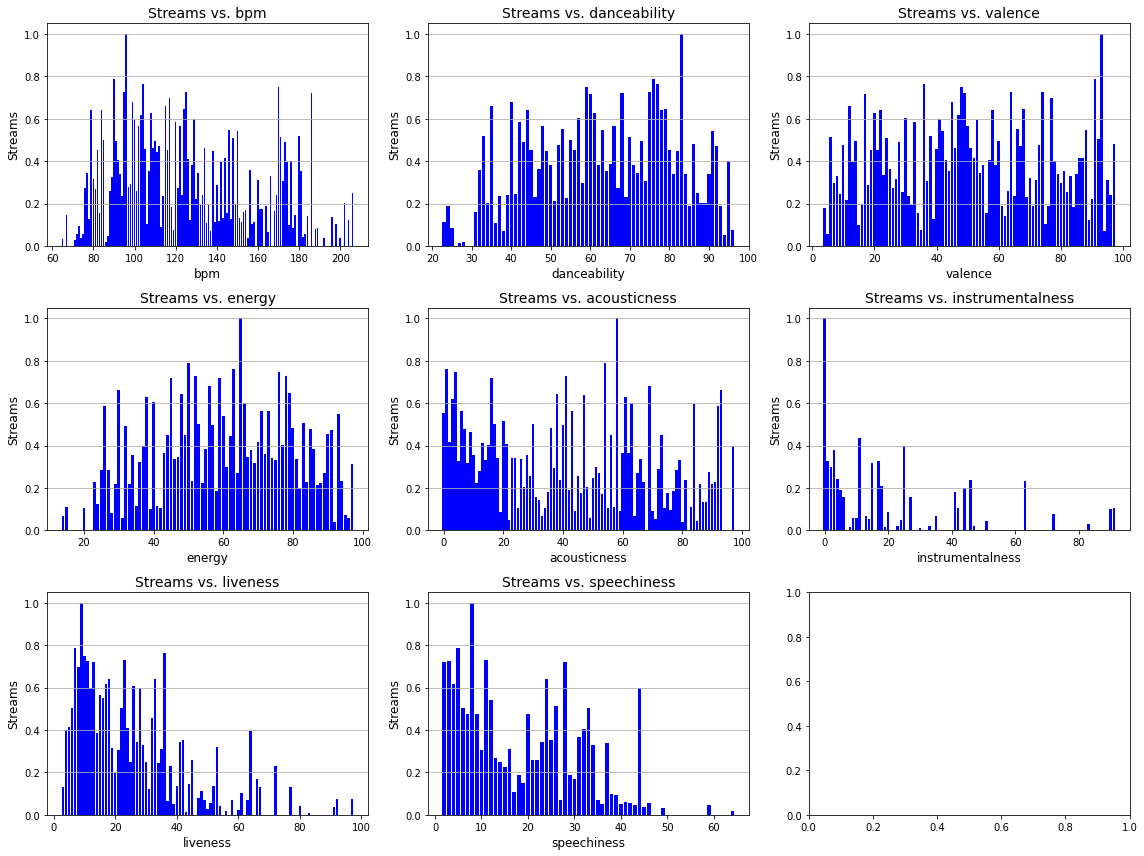

In [33]:
columns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    plt.bar(df_da[column], df_da['streams'], color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.grid(axis='y')
plt.tight_layout()
plt.show()

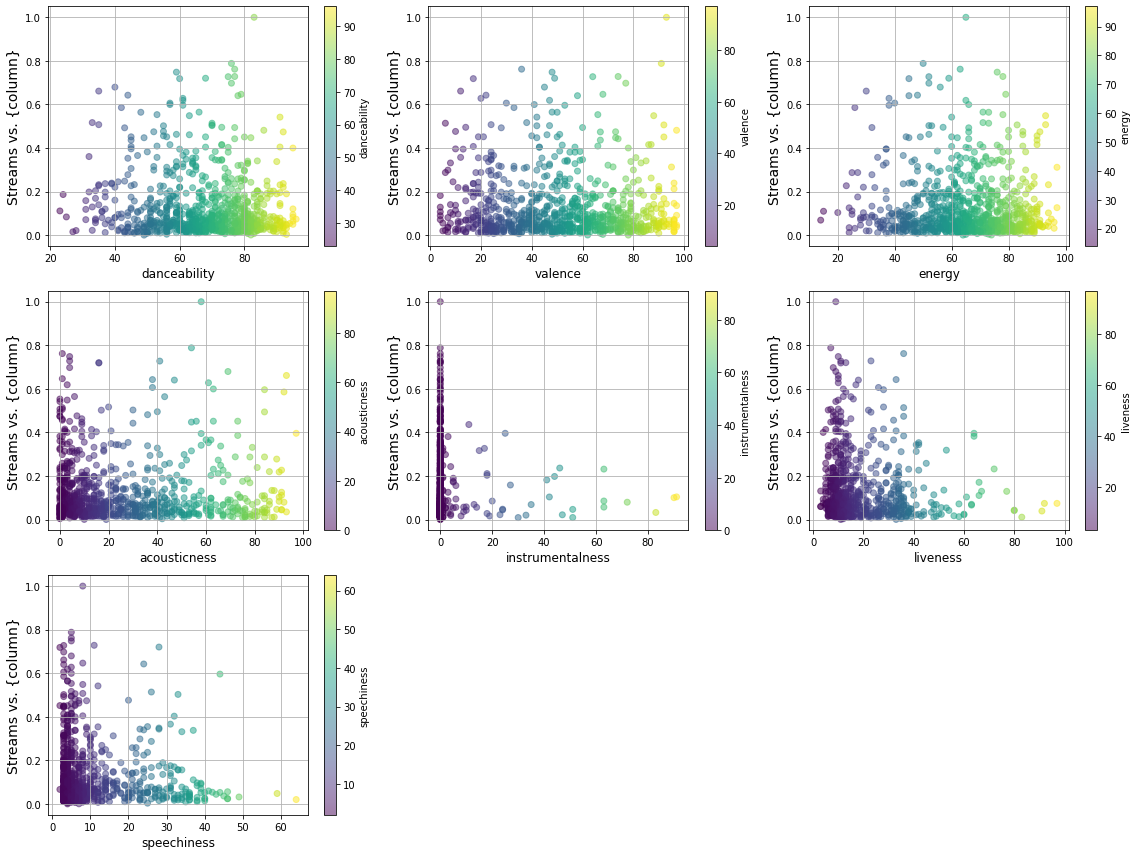

In [34]:
columns_to_plot = ['danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()
colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    
    scatter = plt.scatter(df_da[column], df_da['streams'], c=df_da[column], cmap=colormap, alpha=0.5)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams vs. {column}', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label=column)
    
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [35]:
df_da = df_da.merge(df[['key']], left_index=True, right_index=True, how='inner')
df_da.head()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key_A,...,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,key
0,0.039685,125.0,80.0,89.0,83.0,31.0,0.0,8.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,B
1,0.037533,92.0,71.0,61.0,74.0,7.0,0.0,10.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,C#
2,0.039298,138.0,51.0,32.0,53.0,17.0,0.0,31.0,6.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,F
3,0.224794,170.0,55.0,58.0,72.0,11.0,0.0,11.0,15.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,A
4,0.085117,144.0,65.0,23.0,80.0,14.0,63.0,11.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,A


c:\Users\PYTHON\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  


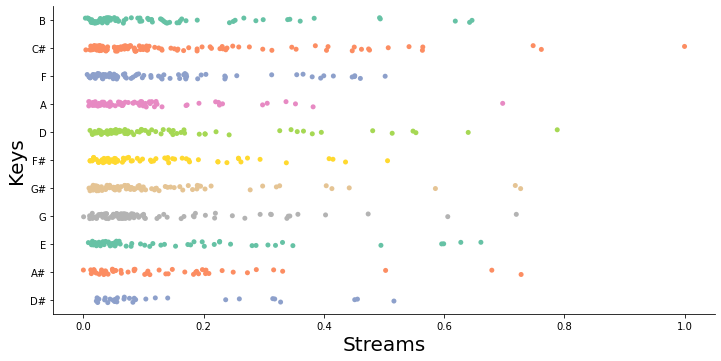

In [36]:
palette = sns.color_palette("Set2", len(df_da['key'].unique()))
sns.catplot(y="key", x="streams", data=df_da, aspect=2, palette=palette)
plt.xlabel("Streams", fontsize=20)
plt.ylabel("Keys", fontsize=20)
plt.show()

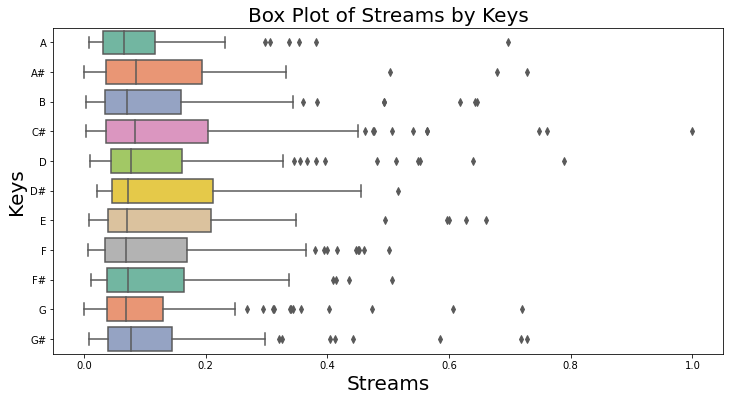

In [37]:
palette = sns.color_palette("Set2", len(df_da['key'].unique()))

sorted_keys = sorted(df_da['key'].unique())
plt.figure(figsize=(12, 6))
sns.boxplot(y="key", x="streams", data=df_da, order=sorted_keys, palette=palette)
plt.xlabel("Streams", fontsize=20)
plt.ylabel("Keys", fontsize=20)
plt.title("Box Plot of Streams by Keys", fontsize=20)
plt.show()

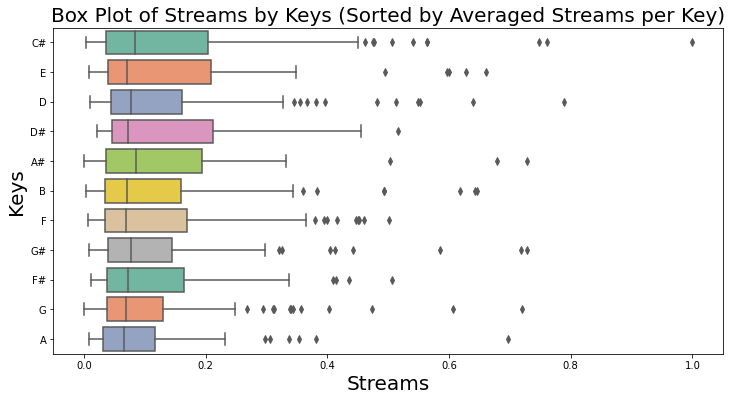

In [38]:
average_streams = df_da.groupby('key')['streams'].mean().sort_values(ascending=False).index.tolist()

palette = sns.color_palette("Set2", len(average_streams))

plt.figure(figsize=(12, 6))
sns.boxplot(y="key", x="streams", data=df_da, order=average_streams, palette=palette)
plt.xlabel("Streams", fontsize=20)
plt.ylabel("Keys", fontsize=20)
plt.title("Box Plot of Streams by Keys (Sorted by Averaged Streams per Key)", fontsize=20)
plt.show()

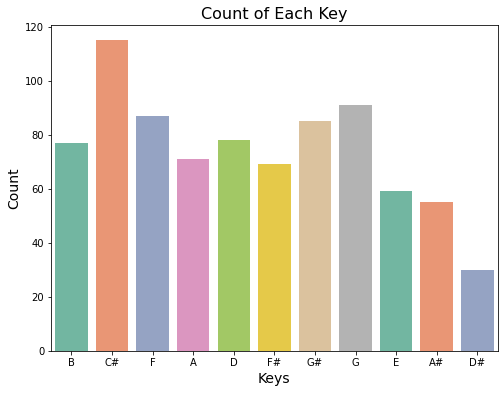

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x="key", data=df_da, palette="Set2")
plt.xlabel("Keys", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Count of Each Key", fontsize=16)
plt.show()

In [40]:
key_counts = df_da['key'].value_counts().reset_index()
key_counts.columns = ['Key', 'Count']

total_count_key = key_counts['Count'].sum()
total_row = pd.DataFrame({'Key': ['Total'], 'Count': [total_count_key]})
key_counts = pd.concat([key_counts, total_row])

#----------------------------------

total_counts = df_da['key'].count()

is_equal = total_counts == key_counts[key_counts['Key'] == 'Total']['Count'].values[0]
print("Is total_count equal to 'Total'Key?", is_equal)

print("Total count of values in the 'key' column:", total_counts)
print(key_counts)

Is total_count equal to 'Total'Key? True
Total count of values in the 'key' column: 817
      Key  Count
0      C#    115
1       G     91
2       F     87
3      G#     85
4       D     78
5       B     77
6       A     71
7      F#     69
8       E     59
9      A#     55
10     D#     30
0   Total    817


In [41]:
key_counts = key_counts[key_counts['Key'] != 'Total']
key_counts.info

<bound method DataFrame.info of    Key  Count
0   C#    115
1    G     91
2    F     87
3   G#     85
4    D     78
5    B     77
6    A     71
7   F#     69
8    E     59
9   A#     55
10  D#     30>

In [42]:
df_da.columns = df_da.columns.str.lower()
key_counts.columns = key_counts.columns.str.lower()

In [43]:
merged_df = key_counts.merge(df_da, on='key')
result_df = merged_df.groupby('key')['streams'].agg(['mean', 'min', 'max']).reset_index()
result_df = result_df.rename(columns={'mean':'average_streams', 'min': 'min_streams', 'max': 'max_streams'})

In [44]:
result_df.head()

,key,average_streams,min_streams,max_streams
0,A,0.102236,0.008946,0.697483
1,A#,0.139584,0.000000,0.728142
2,B,0.132506,0.003355,0.646457
3,C#,0.154569,0.004148,1.000000
4,D,0.142798,0.011011,0.788228


In [45]:
sorted_df = df_da.sort_values(by='streams')
lowest_10 = sorted_df.head(10)

print("10 Lowest values:")
print(lowest_10[['key', 'streams']])

10 Lowest values:
    key   streams
123  A#  0.000000
393   G  0.000382
142   B  0.003355
68   C#  0.004148
30    F  0.006338
248   B  0.007010
104   E  0.008297
193   B  0.008517
150   A  0.008946
577   A  0.008970


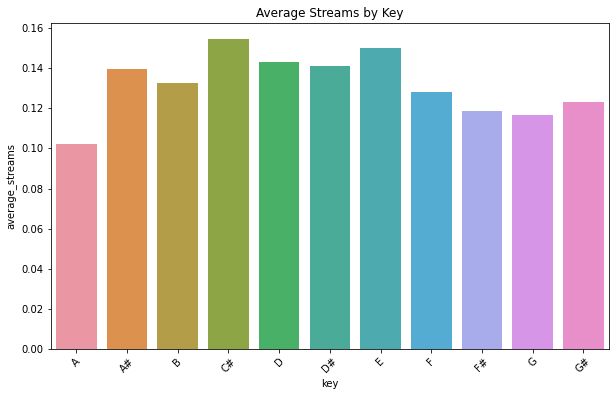

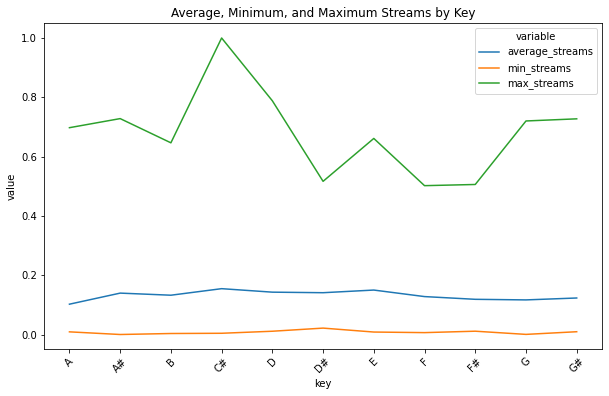

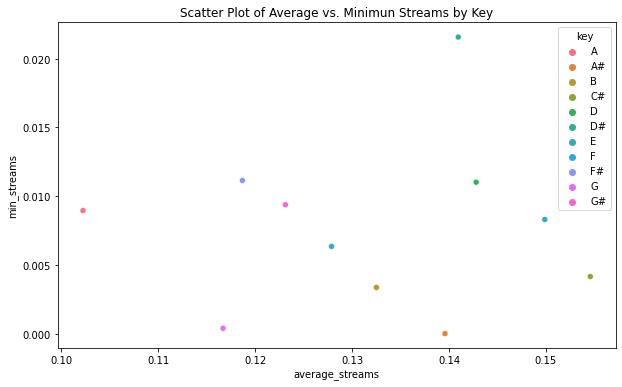

In [46]:
# Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='key', y='average_streams', data=result_df)
plt.title('Average Streams by Key')
plt.xticks(rotation=45)
plt.show()

# Line Chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='key', y='value', hue='variable', data=pd.melt(result_df, id_vars='key'))
plt.title('Average, Minimum, and Maximum Streams by Key')
plt.xticks(rotation=45)
plt.show()

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_streams', y='min_streams', hue='key', data=result_df)
plt.title('Scatter Plot of Average vs. Minimun Streams by Key')
plt.show()


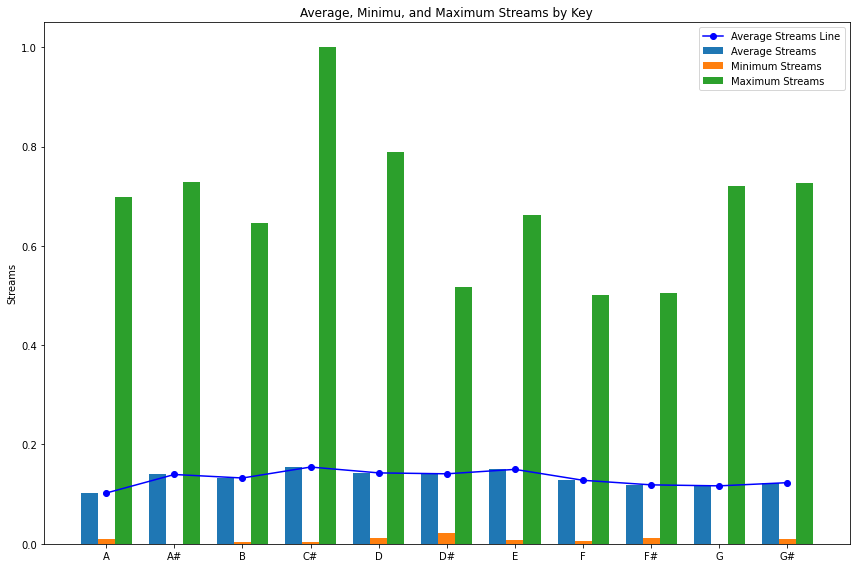

In [47]:

fig, ax = plt.subplots(figsize=(12, 8))

keys = result_df['key']
average_streams = result_df['average_streams']
min_streams = result_df['min_streams']
max_streams = result_df['max_streams']

bar_width = 0.25

# indexes x-axis
x_indexes = np.arange(len(keys))

plt.bar(x_indexes - bar_width, average_streams, width=bar_width, label='Average Streams')
plt.bar(x_indexes, min_streams, width=bar_width, label='Minimum Streams')
plt.bar(x_indexes + bar_width, max_streams, width=bar_width, label='Maximum Streams')

plt.plot(x_indexes, average_streams, marker='o', linestyle='-', color='b', label='Average Streams Line')
plt.xticks(x_indexes, keys)
plt.ylabel('Streams')
plt.title('Average, Minimu, and Maximum Streams by Key')
plt.legend()
plt.tight_layout()
plt.show()

In [48]:
df_da.columns

Index(['streams', 'bpm', 'danceability', 'valence', 'energy', 'acousticness',
       'instrumentalness', 'liveness', 'speechiness', 'key_a', 'key_a#',
       'key_b', 'key_c#', 'key_d', 'key_d#', 'key_e', 'key_f', 'key_f#',
       'key_g', 'key_g#', 'mode_major', 'mode_minor', 'key'],
      dtype='object')

In [49]:
df_da.shape

(817, 23)

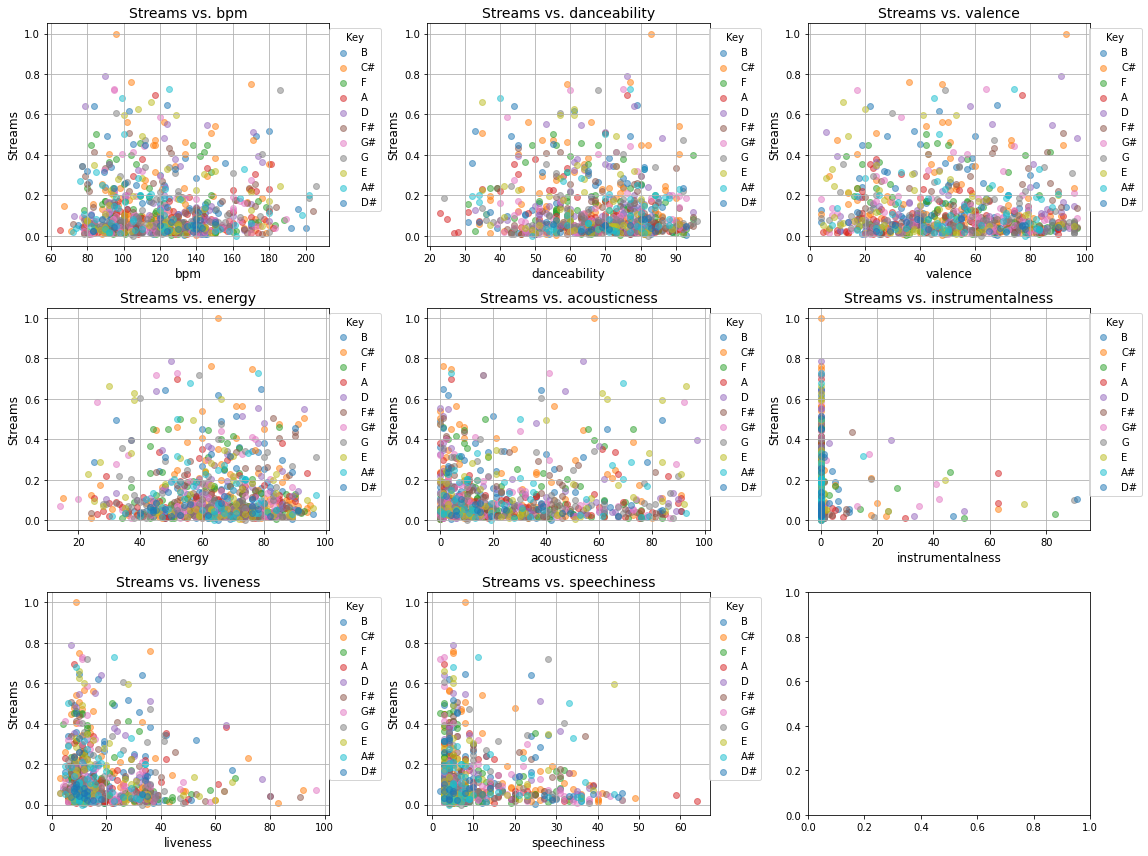

In [50]:
columns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

unique_keys =df_da['key'].unique()

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    for key in unique_keys:
        plt.sca(axes[i])
        plt.scatter(df_da[df_da['key'] == key][column], df_da[df_da['key'] == key]['streams'], label=key, alpha=0.5)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Streams', fontsize=12)
        plt.title(f'Streams vs. {column}', fontsize=14)
        plt.grid(True)
        plt.legend(title='Key', loc='upper right', bbox_to_anchor=(1.2, 1))
    
for j in range(len(unique_keys), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

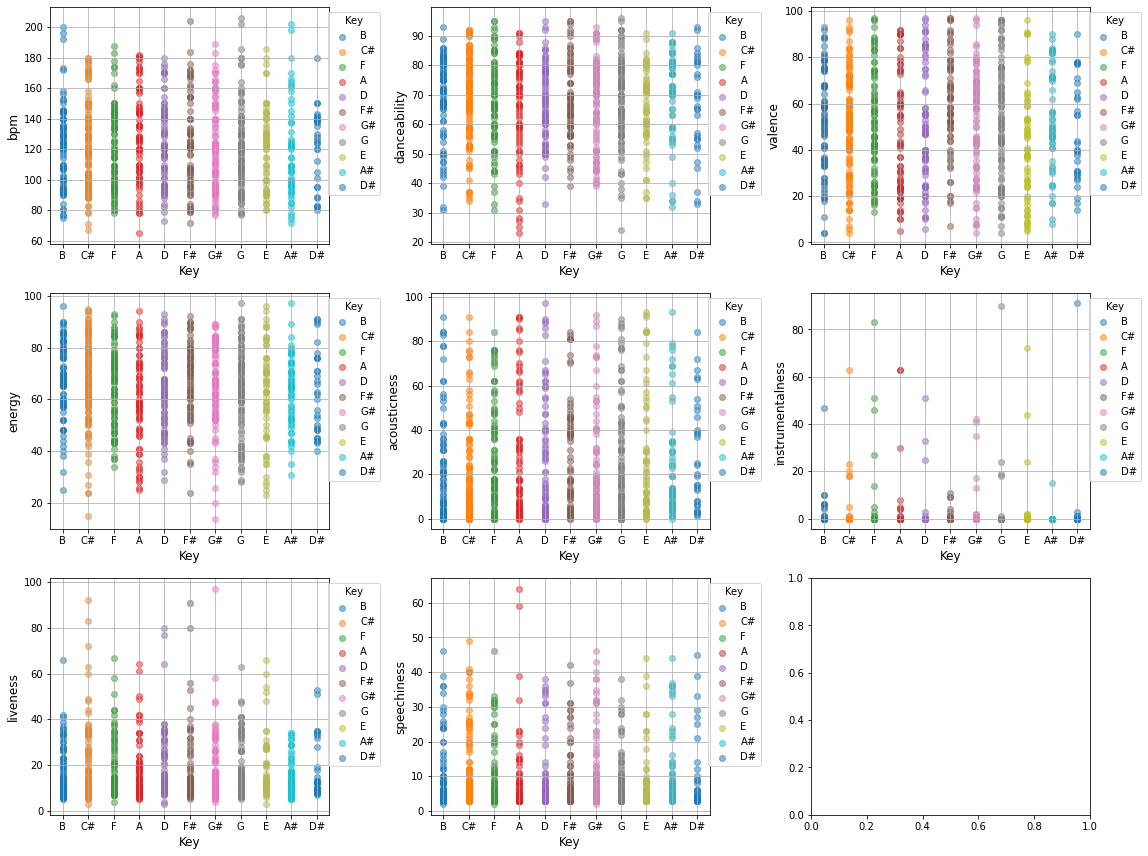

In [51]:
coulumns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

unique_keys = df_da['key'].unique()

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    for key in unique_keys:
        plt.sca(axes[i])
        plt.scatter(df_da[df_da['key'] == key]['key'], df_da[df_da['key'] == key][column], label=key, alpha=0.5)
        plt.xlabel('Key', fontsize=12)
        plt.ylabel(column, fontsize=12)
        plt.grid(True)
        plt.legend(title='Key', loc='upper right', bbox_to_anchor=(1.2, 1))
        

for j in range(len(unique_keys),len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

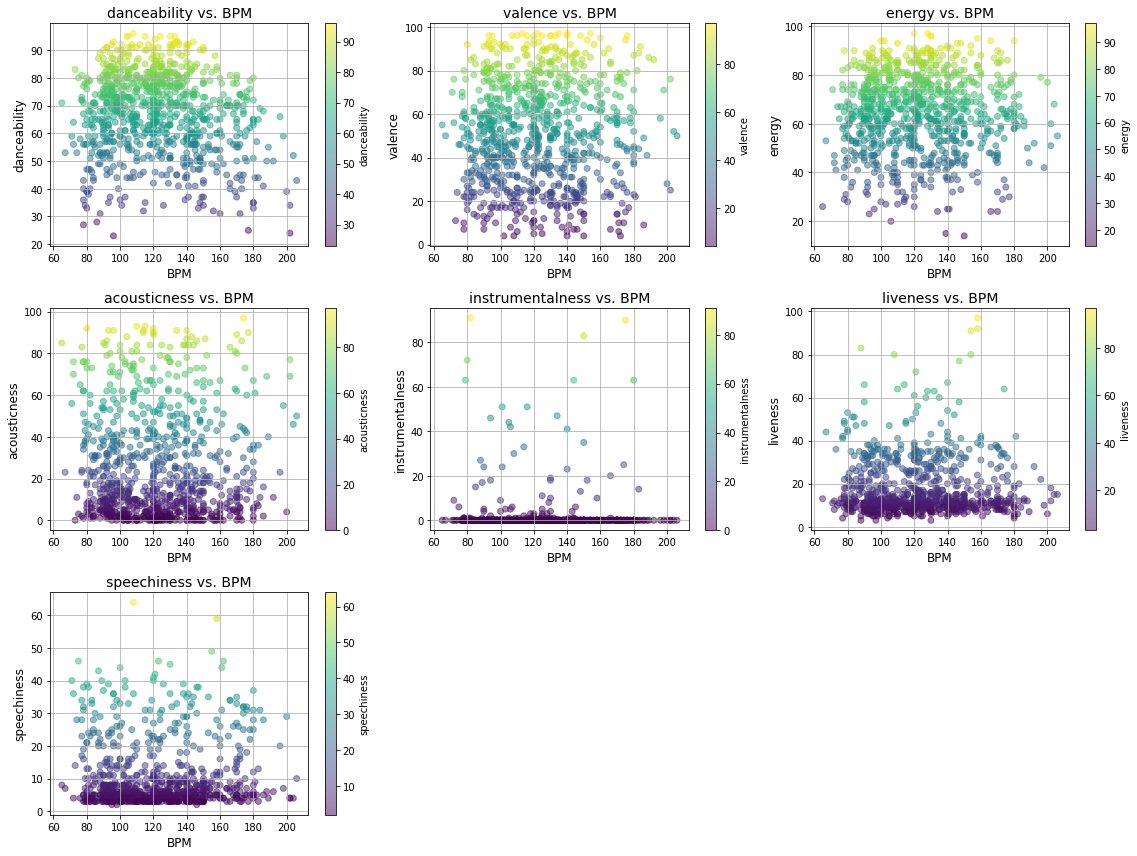

In [52]:
columns_to_plot = ['danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

colormap =plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    
    scatter = plt.scatter(df_da['bpm'], df_da[column], c=df_da[column], cmap=colormap, alpha=0.5)
    
    plt.xlabel('BPM', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title(f'{column} vs. BPM', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label=column)
    
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

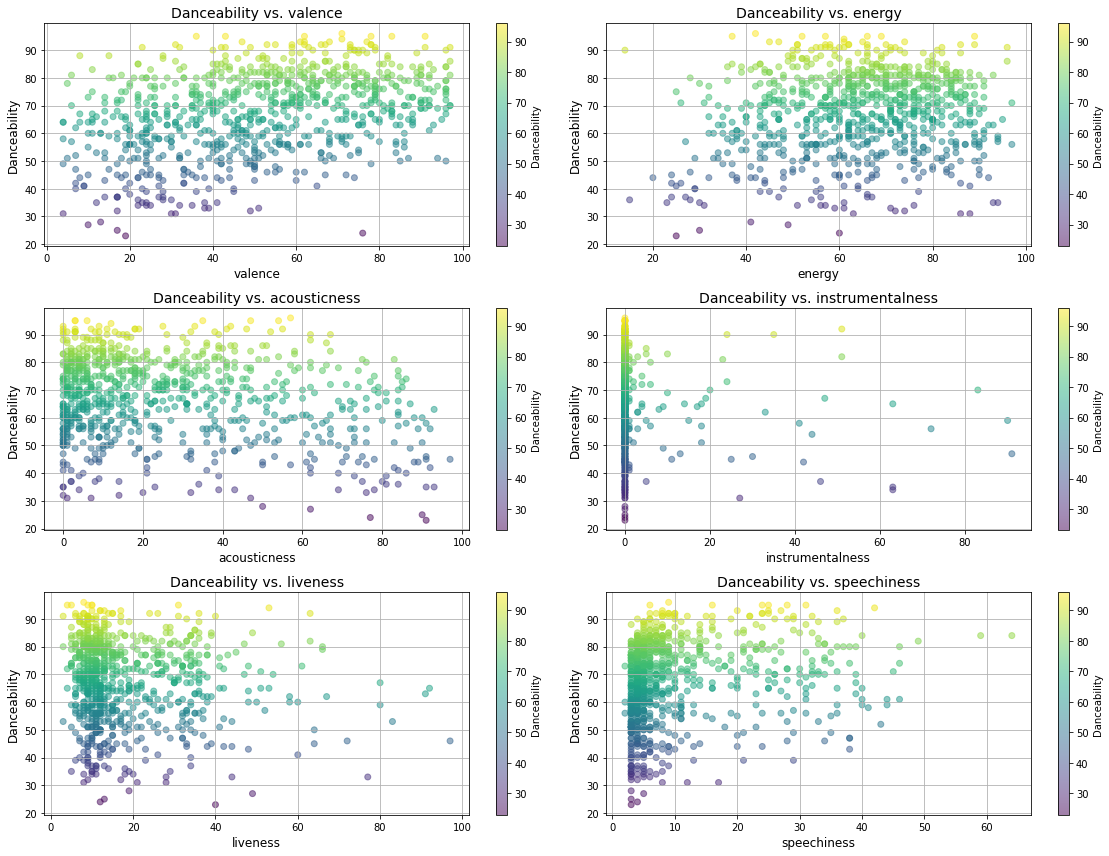

In [53]:
columns_to_plot = ['valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    
    scatter = plt.scatter(df_da[column], df_da['danceability'], c=df_da['danceability'], cmap=colormap, alpha=0.5)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Danceability', fontsize=12)
    plt.title(f'Danceability vs. {column}', fontsize = 14)
    plt.grid(True)
    plt.colorbar(scatter, label='Danceability')
    
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()


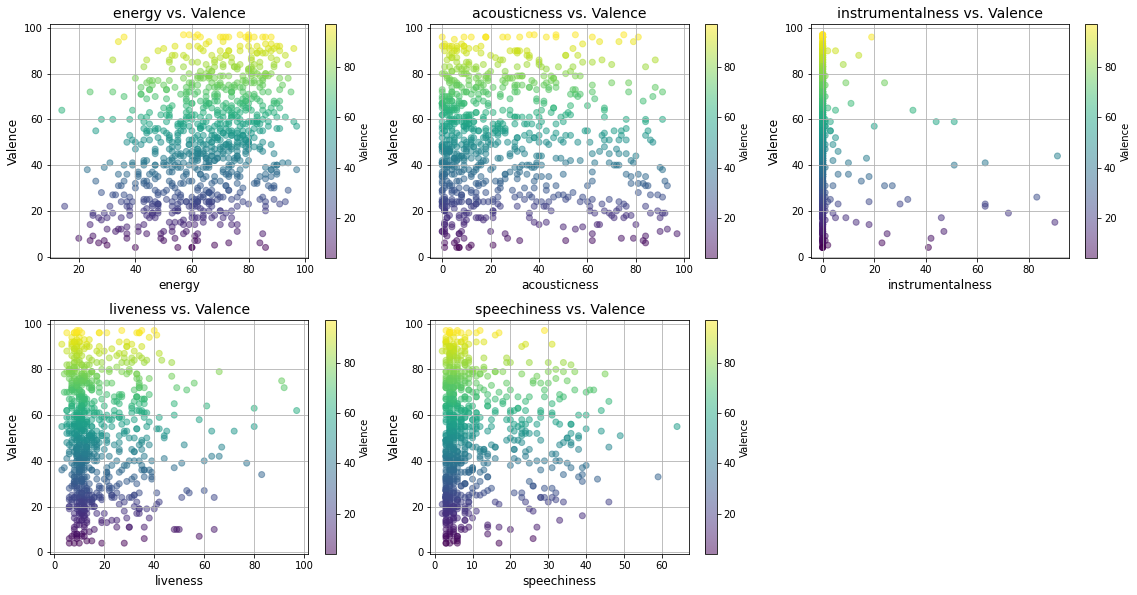

In [54]:
columns_to_plot = ['energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    
    scatter = plt.scatter(df_da[column], df_da['valence'], c=df_da['valence'], cmap=colormap, alpha=0.5)
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Valence', fontsize=12)
    plt.title(f'{column} vs. Valence', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label='Valence')
    
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

ValueError: Given element not contained in the stack

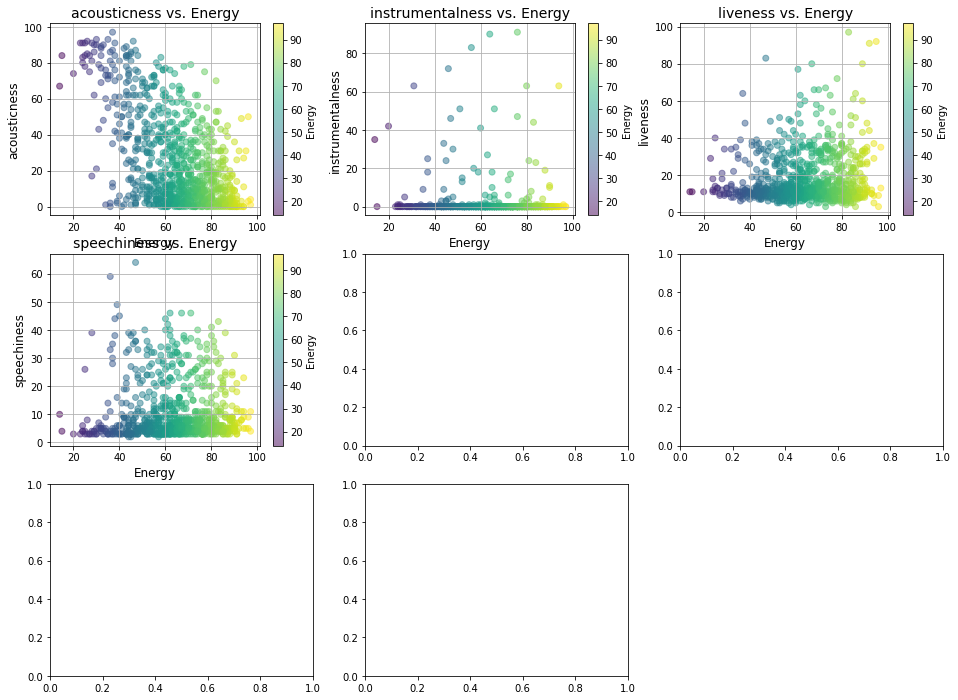

In [55]:
columns_to_plot = ['acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    
    scatter = plt.scatter(df_da['energy'], df_da[column], c=df_da['energy'], cmap=colormap, alpha=0.5)
    
    plt.xlabel('Energy', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title(f'{column} vs. Energy', fontsize=14)
    plt.grid(True)
    
    plt.colorbar(scatter, label='Energy')
    
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

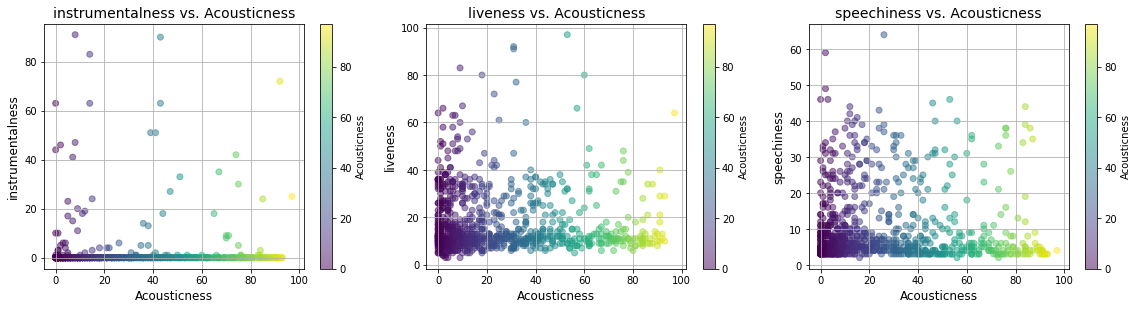

In [56]:
columns_to_plot = ['instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    
    scatter = plt.scatter(df_da['acousticness'], df_da[column], c=df_da['acousticness'], cmap=colormap, alpha=0.5)
    
    plt.xlabel('Acousticness', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title(f'{column} vs. Acousticness', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label='Acousticness')

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

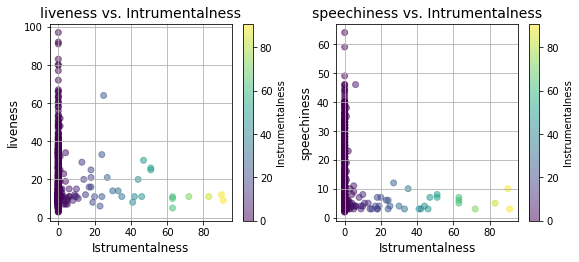

In [57]:
columns_to_plot = ['liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    
    scatter = plt.scatter(df_da['instrumentalness'], df_da[column], c=df_da['instrumentalness'], cmap=colormap, alpha=0.5)
    
    plt.xlabel('Istrumentalness', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title(f'{column} vs. Intrumentalness', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label='Instrumentalness')
    
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

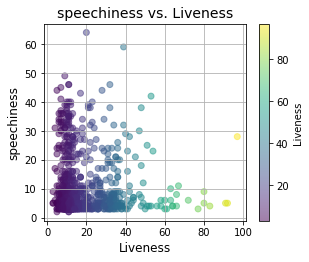

In [59]:
columns_to_plot = ['speechiness']

fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')
for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    scatter = plt.scatter(df_da['liveness'], df_da[column], c=df_da['liveness'], cmap=colormap, alpha=0.5)
    
    plt.xlabel('Liveness', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title(f'{column} vs. Liveness', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label='Liveness')
    
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

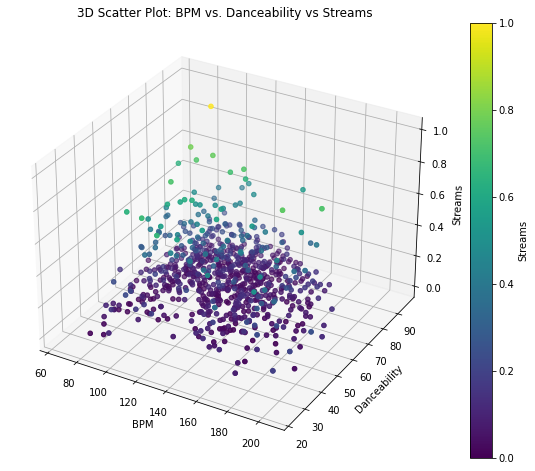

In [60]:
bpm = df_da['bpm']
danceability = df_da['danceability']
streams = df_da['streams']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(bpm, danceability, streams, c=streams, cmap='viridis', marker='o')
ax.set_xlabel('BPM')
ax.set_ylabel('Danceability')
ax.set_zlabel('Streams')

cbar = fig.colorbar(ax.scatter(bpm, danceability, streams, c=streams, cmap='viridis', marker='o'), ax=ax)
cbar.set_label('Streams', rotation=90)
plt.title('3D Scatter Plot: BPM vs. Danceability vs Streams')
plt.show()


In [61]:
df_da.columns

Index(['streams', 'bpm', 'danceability', 'valence', 'energy', 'acousticness',
       'instrumentalness', 'liveness', 'speechiness', 'key_a', 'key_a#',
       'key_b', 'key_c#', 'key_d', 'key_d#', 'key_e', 'key_f', 'key_f#',
       'key_g', 'key_g#', 'mode_major', 'mode_minor', 'key'],
      dtype='object')

In [62]:
top_10_songs = df_da.nlargest(10, 'streams')
top_10_songs.describe()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key_a,...,key_c#,key_d,key_d#,key_e,key_f,key_f#,key_g,key_g#,mode_major,mode_minor
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.0,10.0,10.0,10.0,10.000000,10.000000,10.000000,10.000000
mean,0.756917,117.700000,69.100000,59.400000,59.600000,26.700000,0.0,13.700000,7.500000,0.100000,...,0.300000,0.100000,0.0,0.0,0.0,0.0,0.100000,0.200000,0.700000,0.300000
std,0.090825,33.764051,12.827488,24.636017,10.966616,26.149357,0.0,9.031427,7.663043,0.316228,...,0.483046,0.316228,0.0,0.0,0.0,0.0,0.316228,0.421637,0.483046,0.483046
min,0.679419,90.000000,40.000000,17.000000,45.000000,1.000000,0.0,7.000000,2.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.718876,95.250000,62.000000,45.750000,52.000000,4.000000,0.0,9.000000,3.500000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.250000,0.000000
50%,0.727747,101.500000,75.500000,56.500000,57.500000,16.000000,0.0,10.500000,5.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.758384,123.000000,76.750000,76.250000,64.500000,50.750000,0.0,12.500000,7.250000,0.000000,...,0.750000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.750000
max,1.000000,186.000000,83.000000,93.000000,78.000000,69.000000,0.0,36.000000,28.000000,1.000000,...,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000


In [63]:
top_50_songs = df_da.nlargest(50, 'streams')
top_50_songs.describe()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key_a,...,key_c#,key_d,key_d#,key_e,key_f,key_f#,key_g,key_g#,mode_major,mode_minor
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.567438,120.020000,63.000000,50.640000,62.820000,27.800000,0.220000,15.080000,7.960000,0.020000,...,0.240000,0.120000,0.060000,0.100000,0.120000,0.040000,0.060000,0.080000,0.680000,0.320000
std,0.120800,27.039268,15.126676,24.746684,17.558869,29.151259,1.555635,8.766448,8.621189,0.141421,...,0.431419,0.328261,0.239898,0.303046,0.328261,0.197949,0.239898,0.274048,0.471212,0.471212
min,0.415812,79.000000,33.000000,6.000000,26.000000,0.000000,0.000000,6.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473901,100.500000,53.500000,33.750000,50.500000,3.000000,0.000000,9.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.529135,115.500000,62.000000,48.000000,64.000000,16.000000,0.000000,11.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.641862,132.750000,76.000000,67.750000,77.500000,52.250000,0.000000,17.750000,7.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,186.000000,92.000000,97.000000,93.000000,93.000000,11.000000,36.000000,44.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
top_100_songs = df_da.nlargest(100, 'streams')
top_100_songs.describe()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key_a,...,key_c#,key_d,key_d#,key_e,key_f,key_f#,key_g,key_g#,mode_major,mode_minor
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,0.460157,121.12000,64.090000,48.770000,64.250000,24.860000,0.73000,17.590000,8.840000,0.050000,...,0.180000,0.120000,0.060000,0.090000,0.120000,0.050000,0.100000,0.08000,0.640000,0.360000
std,0.139334,28.95077,14.119329,23.744794,16.340676,27.221137,3.50715,12.386124,9.205532,0.219043,...,0.386123,0.326599,0.238683,0.287623,0.326599,0.219043,0.301511,0.27266,0.482418,0.482418
min,0.299106,77.00000,32.000000,6.000000,26.000000,0.000000,0.00000,4.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.346360,98.25000,55.000000,28.000000,52.000000,3.000000,0.00000,9.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.415498,117.00000,64.000000,47.500000,66.000000,13.000000,0.00000,12.500000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,0.522861,142.50000,75.000000,66.250000,76.250000,41.500000,0.00000,23.000000,9.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,1.000000,186.00000,95.000000,97.000000,97.000000,97.000000,25.00000,64.000000,44.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [65]:
df_da.shape

(817, 23)

In [66]:
top_200_songs = df_da.nlargest(200, 'streams')
top_500_songs = df_da.nlargest(500, 'streams')
top_700_songs = df_da.nlargest(700, 'streams')
top_817_songs = df_da.nlargest(817, 'streams')

last_10_songs = df_da.nsmallest(10, 'streams')
last_50_songs = df_da.nsmallest(50, 'streams')
last_100_songs = df_da.nsmallest(100, 'streams')
last_200_songs = df_da.nsmallest(200, 'streams')
last_500_songs = df_da.nsmallest(500, 'streams')

#### Analysis ----> Keys

In [67]:
key_colors = {'key_a': 'red',
              'key_a#': 'blue',
              'key_b' : 'green',
              'key_c#': 'purple',
              'key_d': 'orange',
              'key_d#': 'cyan',
              'key_e' : 'magenta',
              'key_f' : 'yellow',
              'key_f#': 'lime',
              'key_g': 'pink',
              'key_g#': 'brown'
            }

key_columns = ['key_a', 'key_a#', 'key_b', 'key_c#', 'key_d', 'key_d#', 'key_e', 'key_f', 'key_f#', 'key_g', 'key_g#']


In [68]:
df_da.shape

(817, 23)

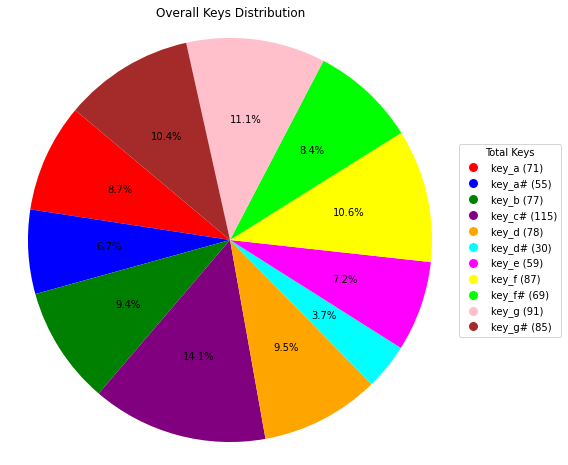

In [69]:
key_df = df_da[key_columns]

key_counts = key_df.eq(1).sum()

plt.figure(figsize=(8, 8))
plt.pie(key_counts, labels=None, autopct='%1.1f%%', startangle=140, colors=[key_colors[key] for key in key_counts.index])
plt.title('Overall Keys Distribution')
plt.axis('equal')

legend_labels = [key + f" ({key_counts[key]})" for key in key_counts.index]
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=key_colors[key]) for label, key in zip(legend_labels, key_counts.index)]
plt.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5), title='Total Keys')

plt.show()

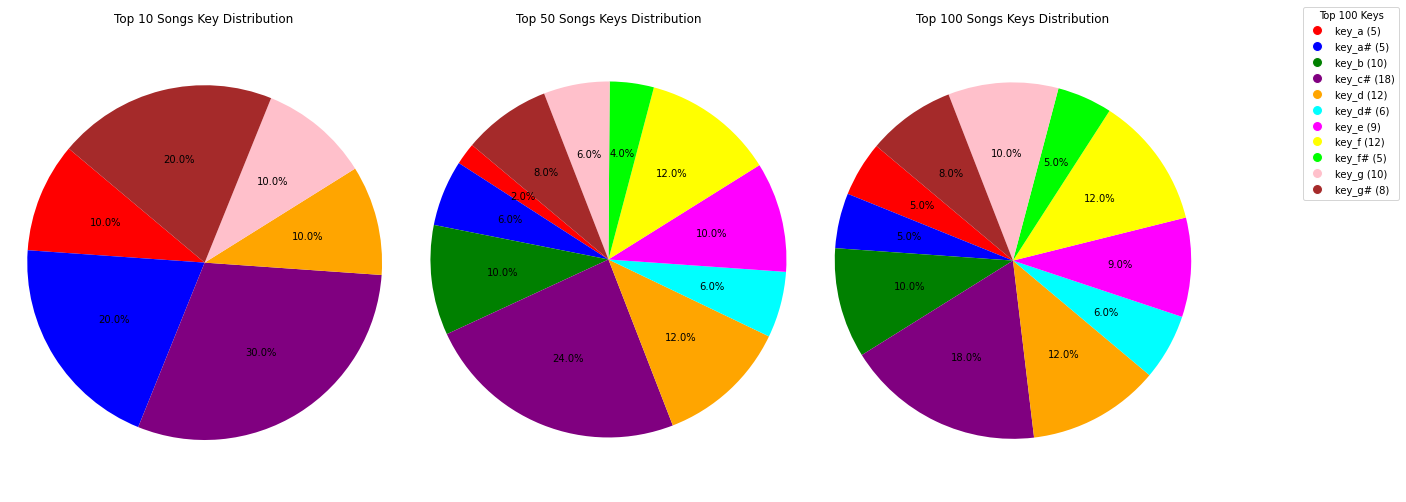

In [70]:
dataframes = [top_10_songs, top_50_songs, top_100_songs]

chart_titles = ['Top 10 Songs Key Distribution', 'Top 50 Songs Keys Distribution', 'Top 100 Songs Keys Distribution']

fig, axes = plt.subplots(1, len(dataframes), figsize=(17, 7))

for i, (df_da_copy, title) in enumerate(zip(dataframes, chart_titles)):
    key_df = df_da_copy[key_columns]
    
    key_counts = key_df.eq(1).sum()
    
    key_counts_filtered = key_counts[key_counts > 0]
    
    ax = axes[i]
    ax.pie(key_counts_filtered, labels=None, autopct='%1.1f%%', startangle=140, colors=[key_colors[key] for key in key_counts_filtered.index])
    ax.set_title(title)
    ax.axis('equal')
    
legend_labels = [key + f" ({key_counts_filtered[key]})" for key in key_counts_filtered.index]
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=key_colors[key]) for label, key in zip(legend_labels, key_counts_filtered.index)]
fig.legend(handles=legend_patches, loc='upper right', title='Top 100 Keys', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()

In [71]:
dataframes = [top_10_songs, top_50_songs, top_100_songs, top_200_songs, top_500_songs, top_700_songs, top_817_songs]
labels = ['Top 10', 'Top 50', 'Top 100', 'Top 200', 'Top 500', 'Top 700', 'Top 817']
key_of_interest = 'key_c#'

In [72]:
df_da.shape

(817, 23)

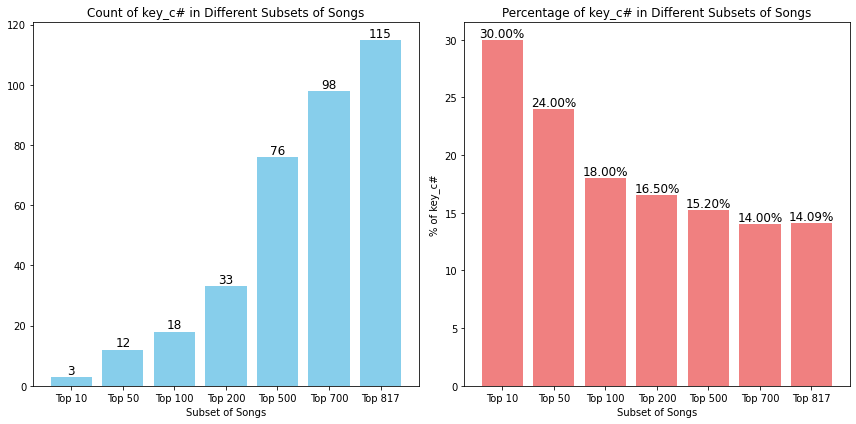

In [73]:
key_counts = []
key_percentages = []

for df in dataframes:
    key_count = df[key_of_interest].eq(1).sum()
    key_counts.append(key_count)
    key_percentage = (key_count / len(df)) * 100
    key_percentages.append(key_percentage)
    
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.bar(labels, key_counts, color='skyblue')
plt.xlabel('Subset of Songs')
plt.title(f'Count of {key_of_interest} in Different Subsets of Songs')

for i, count in enumerate(key_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)
    
plt.subplot(122)
plt.bar(labels, key_percentages, color='lightcoral')
plt.xlabel('Subset of Songs')
plt.ylabel(f'% of {key_of_interest}')
plt.title(f'Percentage of {key_of_interest} in Different Subsets of Songs')

for i, percentage in enumerate(key_percentages):
    plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=12)
    
plt.tight_layout()
plt.show()
    

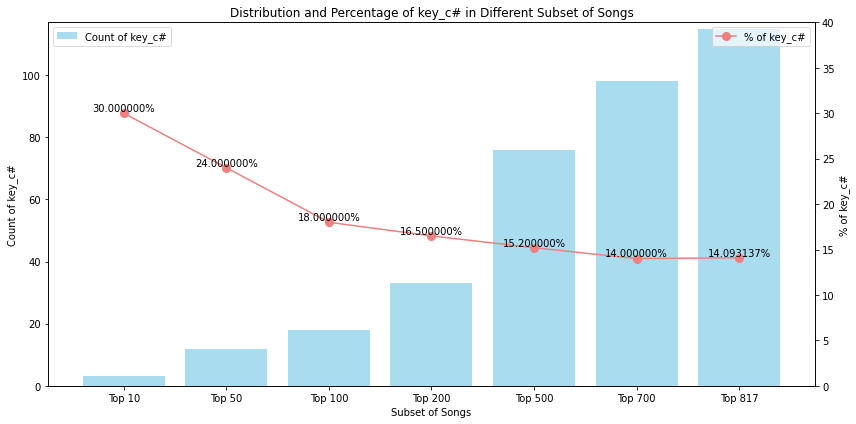

In [74]:
key_counts = []
key_percentages = []

for df in dataframes:
    key_count = df[key_of_interest].eq(1).sum()
    key_counts.append(key_count)
    key_percentage = (key_count / len(df)) * 100
    key_percentages.append(key_percentage)
    
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(labels, key_counts, color='skyblue', alpha=0.7, label=f'Count of {key_of_interest}')
ax1.set_xlabel('Subset of Songs')
ax1.set_ylabel(f'Count of {key_of_interest}')
ax1.set_title(f'Distribution and Percentage of {key_of_interest} in Different Subset of Songs')
ax1.set_ylim(0, max(key_counts) + 2)

#-------

ax2 = ax1.twinx()
ax2.plot(labels, key_percentages, marker='o', color='lightcoral', linestyle='-', markersize=8, label=f'% of {key_of_interest}')
ax2.set_ylabel(f'% of {key_of_interest}')
ax2.set_ylim(0, max(key_percentages) + 10)

for i, percentage in enumerate(key_percentages):
    ax2.text(i, percentage, f'{percentage:2f}%', ha='center', va='bottom', fontsize=10)
    
ax1.legend(loc='upper left', framealpha=0.7)

ax2.legend(loc='upper right', framealpha=0.7)

plt.tight_layout()
plt.show()

##### Massive contrast between Top 10 and Last 10, 300% factor

In [75]:
df_da.head()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key_a,...,key_d,key_d#,key_e,key_f,key_f#,key_g,key_g#,mode_major,mode_minor,key
0,0.039685,125.0,80.0,89.0,83.0,31.0,0.0,8.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,B
1,0.037533,92.0,71.0,61.0,74.0,7.0,0.0,10.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,C#
2,0.039298,138.0,51.0,32.0,53.0,17.0,0.0,31.0,6.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,F
3,0.224794,170.0,55.0,58.0,72.0,11.0,0.0,11.0,15.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,A
4,0.085117,144.0,65.0,23.0,80.0,14.0,63.0,11.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,A


#### Analysis: Mode: Major & Minor

ValueError: shape mismatch: objects cannot be broadcast to a single shape

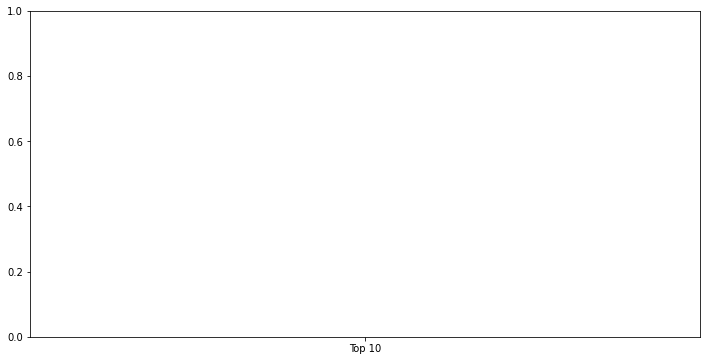

In [77]:
dataframes = [top_10_songs, top_50_songs, top_100_songs, top_200_songs, top_500_songs, top_700_songs, top_817_songs]

labels = ['Top 10', 'Top 50', 'Top 100', 'Top 200', 'Top 500', 'Top 817']

columns_of_interest = ['mode_major', 'mode_minor']

counts_1 = {col: [] for col in columns_of_interest}
counts_0 = {col: [] for col in columns_of_interest}

for df in dataframes:
    for col in columns_of_interest:
        count_1 = df[col].eq(1.0).sum()
        count_0 = len(df) - count_1
        counts_1[col].append(count_1)
        counts_0[col].append(count_0)
    
for col in columns_of_interest:
    plt.figure(figsize=(12, 6))
    
    plt.bar(labels, counts_1[col], color='skyblue', alpha=0.7, label=f'Count of {col} (1.0)')
    plt.xlabel('Subset of Songs')
    plt.ylabel(f'Distribution of {col} in Different Subsets of Songs')
    plt.ylim(0, max(counts_1[col]) + 2)
    
    for i, count in enumerate(counts_1[col]):
        plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
        
    plt.twinx()
    plt.plot(labels, [(count / len(df)) * 100 for count, df in zip(counts_1[col], dataframes)], marker='o', color='lightcoral', linestyle='-', markersize=8, label=f'% of {col}')
    plt.ylabel(f'% of {col}')
    plt.ylim(0, 110)
    
    for i, count in enumerate(counts_1[col]):
        plt.text(i, (count / len(dataframes[i])) * 100, f'{(count / len(dataframes[i])) * 100:.2f}%', ha='center', va='bottom', fontsize=10)
        
    plt.legend(loc='upper left', framealpha=0.7)
    plt.tight_layout()
    
plt.show()